In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Load the dataset
data = pd.read_excel('Processed_Data_FINAL_final.xlsx')

# Display the first few rows of the dataset
print(data.head())

# Check the columns and data types
print(data.info())

# Basic statistics
print(data.describe())

        Date Product   Batch Operator          Start Time            End Time  \
0 2024-08-29  OR-600  422111      Mac 2024-08-29 11:50:00 2024-08-29 14:05:00   
1 2024-08-29  LE-600  422112      Mac 2024-08-29 14:05:00 2024-08-29 15:45:00   
2 2024-08-29  LE-600  422113      Mac 2024-08-29 15:45:00 2024-08-29 17:35:00   
3 2024-08-29  LE-600  422114      Mac 2024-08-29 17:35:00 2024-08-29 19:15:00   
4 2024-08-29  LE-600  422115  Charlie 2024-08-29 19:15:00 2024-08-29 20:39:00   

   Duration  Hour      Shift  Total Downtime Downtime Factors (Numbers)  \
0       135    11    Morning              75                       2, 7   
1       100    14  Afternoon              40                       2, 8   
2       110    15  Afternoon              50                          2   
3       100    17  Afternoon              40                       4, 6   
4        84    19    Evening              24                         10   

          Downtime Factors (Descriptions)      Flavor    Size 

# **1. Downtime Analysis**

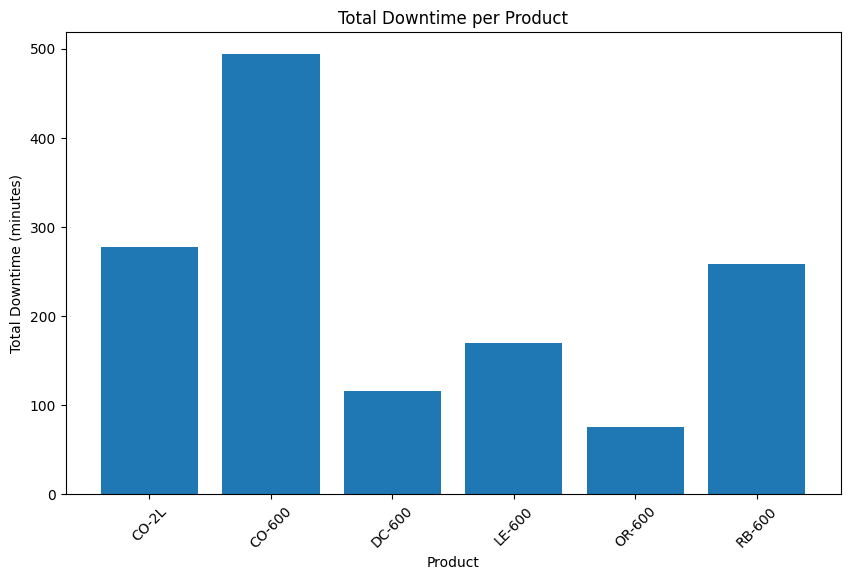

In [ ]:
# Group by product and calculate total downtime
total_downtime_per_product = data.groupby('Product')['Total Downtime'].sum().reset_index()

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(total_downtime_per_product['Product'], total_downtime_per_product['Total Downtime'])
plt.xlabel('Product')
plt.ylabel('Total Downtime (minutes)')
plt.title('Total Downtime per Product')
plt.xticks(rotation=45)
plt.show()

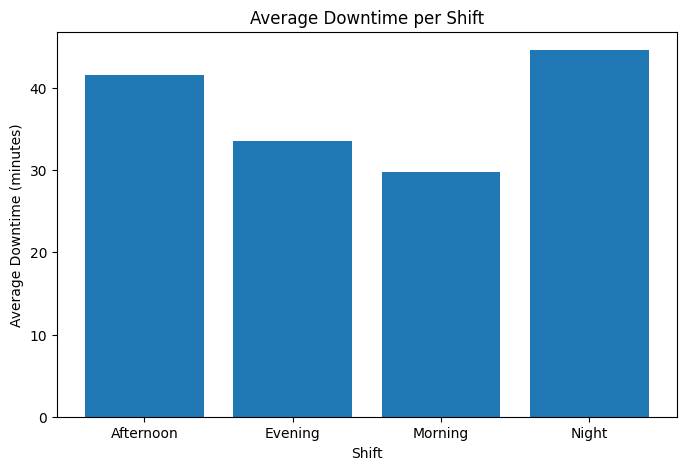

In [ ]:
# Group by shift and calculate average downtime
avg_downtime_per_shift = data.groupby('Shift')['Total Downtime'].mean().reset_index()

# Plot the results
plt.figure(figsize=(8, 5))
plt.bar(avg_downtime_per_shift['Shift'], avg_downtime_per_shift['Total Downtime'])
plt.xlabel('Shift')
plt.ylabel('Average Downtime (minutes)')
plt.title('Average Downtime per Shift')
plt.show()

In [ ]:
# Group by operator and calculate total downtime
total_downtime_per_operator = data.groupby('Operator')['Total Downtime'].sum().reset_index()

# Find the operator with the highest downtime
operator_with_highest_downtime = total_downtime_per_operator.loc[total_downtime_per_operator['Total Downtime'].idxmax()]
print(f"Operator with the highest total downtime: {operator_with_highest_downtime['Operator']} ({operator_with_highest_downtime['Total Downtime']} minutes)")

Operator with the highest total downtime: Charlie (384 minutes)


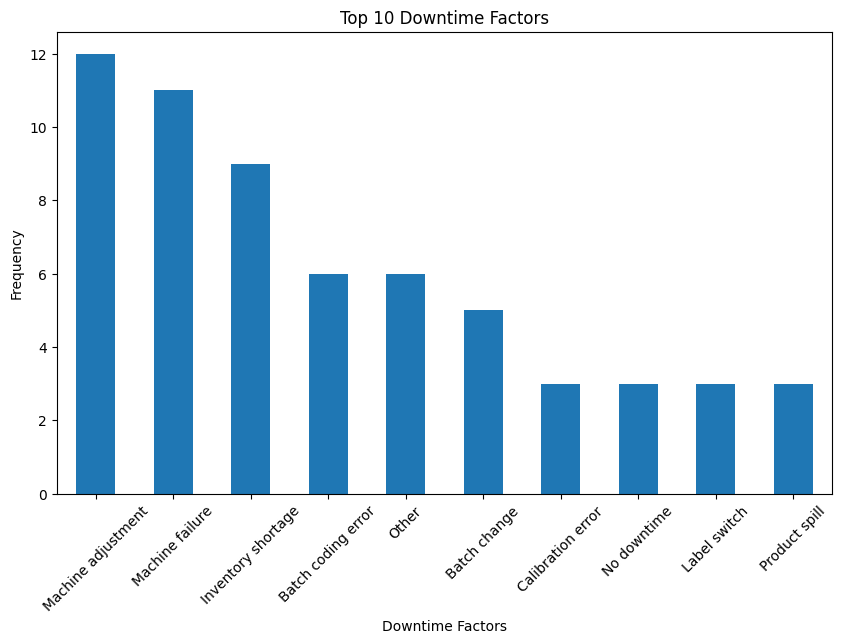

In [ ]:
# Split downtime factors and count their occurrences
downtime_factors = data['Downtime Factors (Descriptions)'].str.split(', ', expand=True).stack().value_counts()

# Plot the top 10 downtime factors
plt.figure(figsize=(10, 6))
downtime_factors.head(10).plot(kind='bar')
plt.xlabel('Downtime Factors')
plt.ylabel('Frequency')
plt.title('Top 10 Downtime Factors')
plt.xticks(rotation=45)
plt.show()

# **2. Efficiency Analysis**


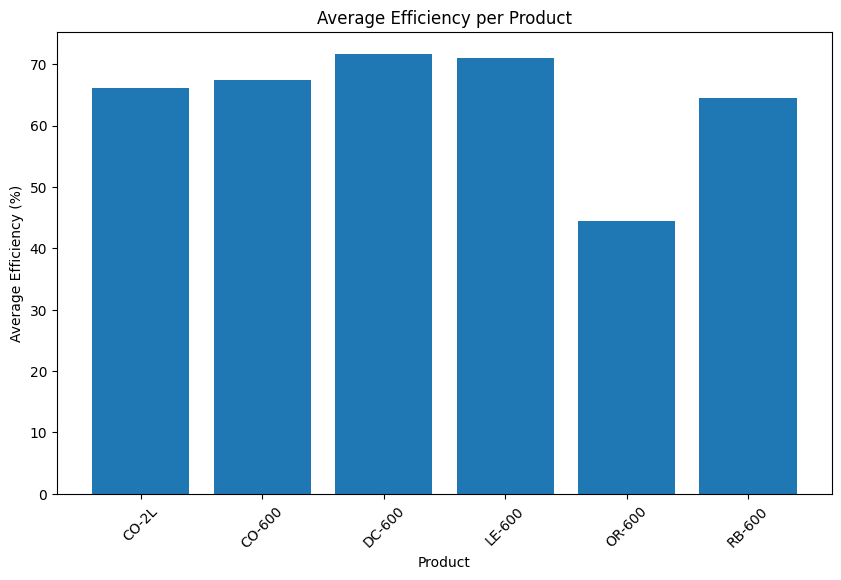

In [ ]:
# Group by product and calculate average efficiency
avg_efficiency_per_product = data.groupby('Product')['Efficiency'].mean().reset_index()

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(avg_efficiency_per_product['Product'], avg_efficiency_per_product['Efficiency'])
plt.xlabel('Product')
plt.ylabel('Average Efficiency (%)')
plt.title('Average Efficiency per Product')
plt.xticks(rotation=45)
plt.show()

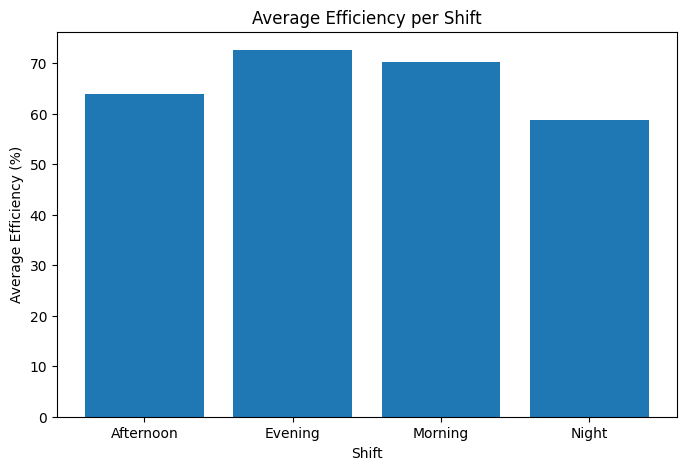

In [ ]:
# Group by shift and calculate average efficiency
avg_efficiency_per_shift = data.groupby('Shift')['Efficiency'].mean().reset_index()

# Plot the results
plt.figure(figsize=(8, 5))
plt.bar(avg_efficiency_per_shift['Shift'], avg_efficiency_per_shift['Efficiency'])
plt.xlabel('Shift')
plt.ylabel('Average Efficiency (%)')
plt.title('Average Efficiency per Shift')
plt.show()

In [ ]:
# Group by operator and calculate average efficiency
avg_efficiency_per_operator = data.groupby('Operator')['Efficiency'].mean().reset_index()

# Find the operator with the highest average efficiency
operator_with_highest_efficiency = avg_efficiency_per_operator.loc[avg_efficiency_per_operator['Efficiency'].idxmax()]
print(f"Operator with the highest average efficiency: {operator_with_highest_efficiency['Operator']} ({operator_with_highest_efficiency['Efficiency']:.2f}%)")

Operator with the highest average efficiency: Charlie (70.97%)


# **3. Batch Analysis**

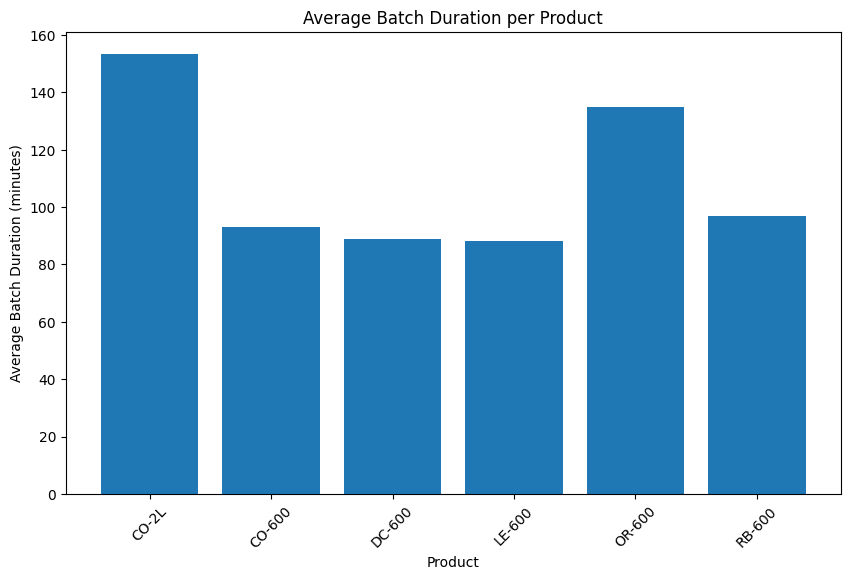

In [ ]:
# Group by product and calculate average batch duration
avg_batch_duration_per_product = data.groupby('Product')['Duration'].mean().reset_index()

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(avg_batch_duration_per_product['Product'], avg_batch_duration_per_product['Duration'])
plt.xlabel('Product')
plt.ylabel('Average Batch Duration (minutes)')
plt.title('Average Batch Duration per Product')
plt.xticks(rotation=45)
plt.show()

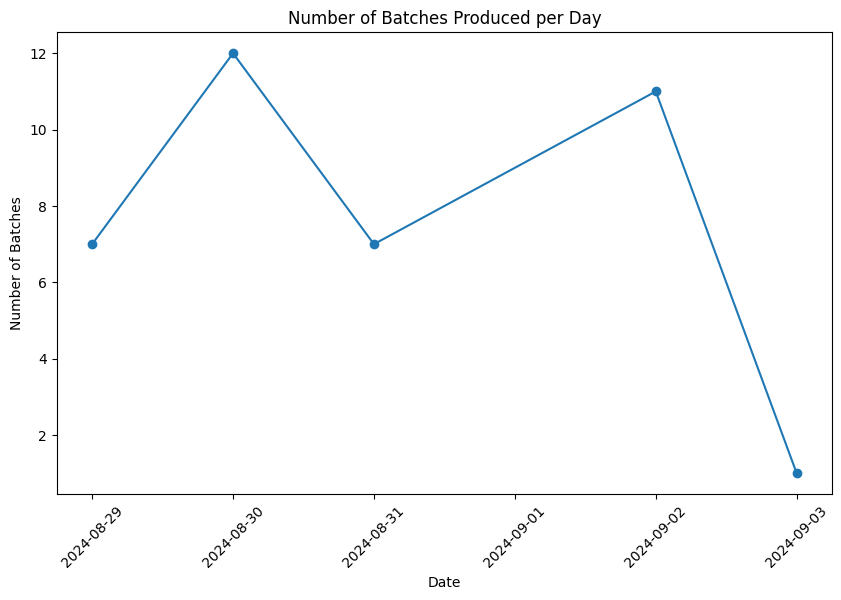

In [ ]:
# Group by date and count the number of batches
batches_per_day = data.groupby('Date')['Batch'].count().reset_index()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(batches_per_day['Date'], batches_per_day['Batch'], marker='o')
plt.xlabel('Date')
plt.ylabel('Number of Batches')
plt.title('Number of Batches Produced per Day')
plt.xticks(rotation=45)
plt.show()

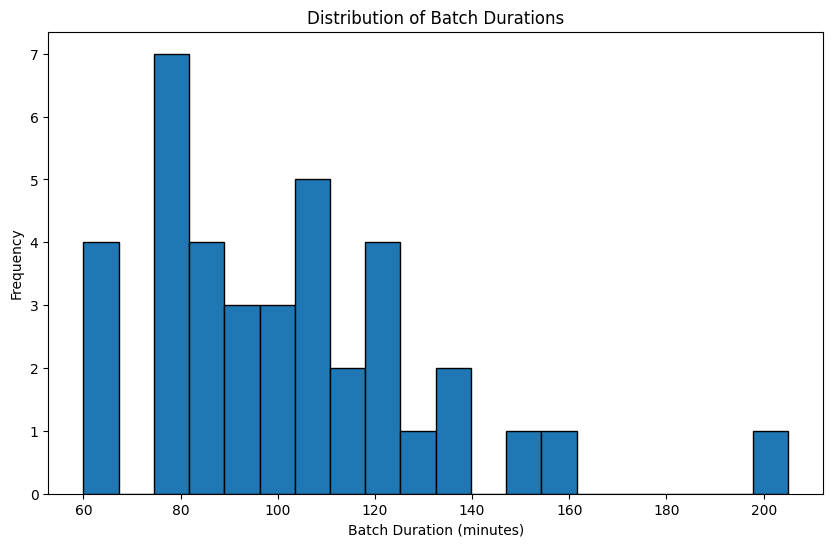

In [ ]:
# Plot the distribution of batch durations
plt.figure(figsize=(10, 6))
plt.hist(data['Duration'], bins=20, edgecolor='black')
plt.xlabel('Batch Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Batch Durations')
plt.show()

# **4. Shift Analysis**

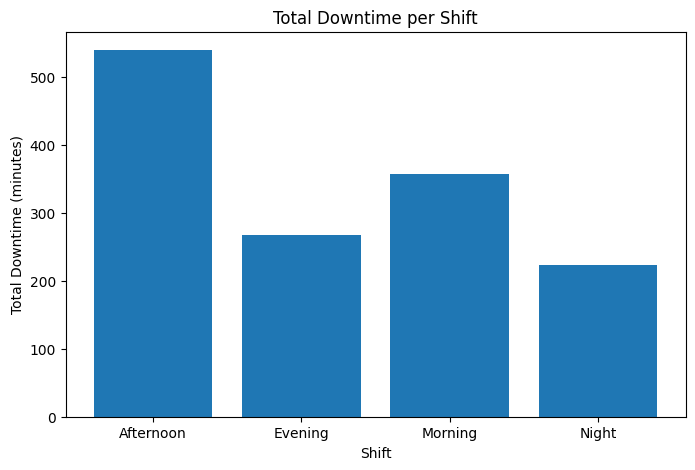

In [ ]:
# Group by shift and calculate total downtime
total_downtime_per_shift = data.groupby('Shift')['Total Downtime'].sum().reset_index()

# Plot the results
plt.figure(figsize=(8, 5))
plt.bar(total_downtime_per_shift['Shift'], total_downtime_per_shift['Total Downtime'])
plt.xlabel('Shift')
plt.ylabel('Total Downtime (minutes)')
plt.title('Total Downtime per Shift')
plt.show()

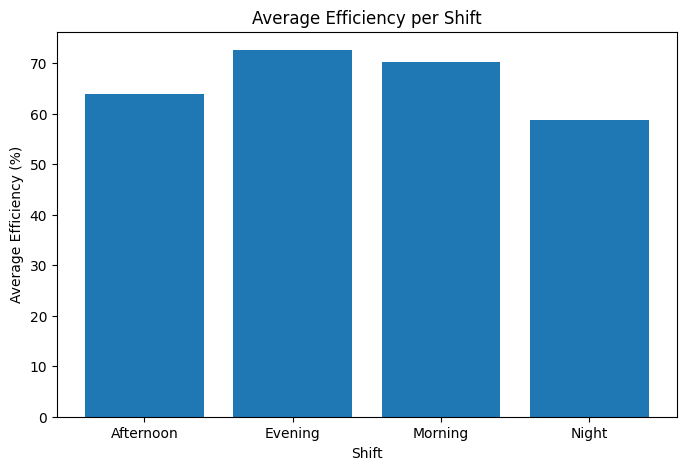

In [ ]:
# Group by shift and calculate average efficiency
avg_efficiency_per_shift = data.groupby('Shift')['Efficiency'].mean().reset_index()

# Plot the results
plt.figure(figsize=(8, 5))
plt.bar(avg_efficiency_per_shift['Shift'], avg_efficiency_per_shift['Efficiency'])
plt.xlabel('Shift')
plt.ylabel('Average Efficiency (%)')
plt.title('Average Efficiency per Shift')
plt.show()

In [ ]:
# Group by shift and count the number of batches
batches_per_shift = data.groupby('Shift')['Batch'].count().reset_index()

# Find the shift with the highest number of batches
shift_with_most_batches = batches_per_shift.loc[batches_per_shift['Batch'].idxmax()]
print(f"Shift with the highest number of batches: {shift_with_most_batches['Shift']} ({shift_with_most_batches['Batch']} batches)")

Shift with the highest number of batches: Afternoon (13 batches)


# **5. Product Analysis**

In [ ]:
# Group by product and calculate total downtime
total_downtime_per_product = data.groupby('Product')['Total Downtime'].sum().reset_index()

# Find the product with the highest total downtime
product_with_highest_downtime = total_downtime_per_product.loc[total_downtime_per_product['Total Downtime'].idxmax()]
print(f"Product with the highest total downtime: {product_with_highest_downtime['Product']} ({product_with_highest_downtime['Total Downtime']} minutes)")

Product with the highest total downtime: CO-600 (494 minutes)


In [ ]:
# Group by product and calculate average efficiency
avg_efficiency_per_product = data.groupby('Product')['Efficiency'].mean().reset_index()

# Find the product with the highest average efficiency
product_with_highest_efficiency = avg_efficiency_per_product.loc[avg_efficiency_per_product['Efficiency'].idxmax()]
print(f"Product with the highest average efficiency: {product_with_highest_efficiency['Product']} ({product_with_highest_efficiency['Efficiency']:.2f}%)")

Product with the highest average efficiency: DC-600 (71.67%)


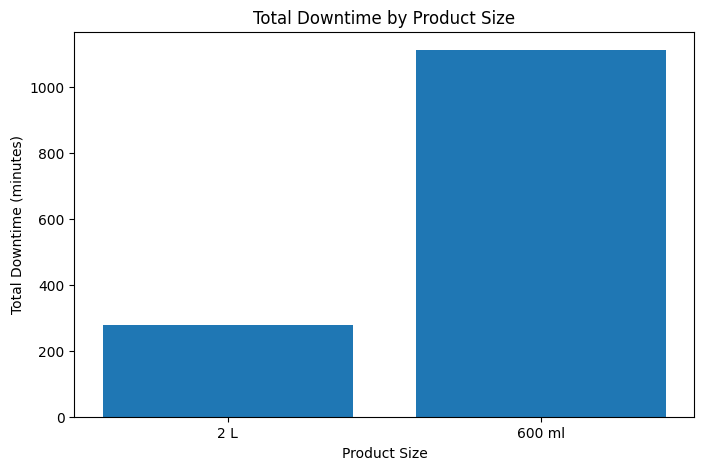

In [ ]:
# Group by product size and calculate total downtime
downtime_by_size = data.groupby('Size')['Total Downtime'].sum().reset_index()

# Plot the results
plt.figure(figsize=(8, 5))
plt.bar(downtime_by_size['Size'].astype(str), downtime_by_size['Total Downtime'])
plt.xlabel('Product Size')
plt.ylabel('Total Downtime (minutes)')
plt.title('Total Downtime by Product Size')
plt.show()

<ipython-input-30-5f9a455ac32b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Shift", y="Efficiency", data=shift_analysis, ax=ax1, palette="muted", label="Efficiency")


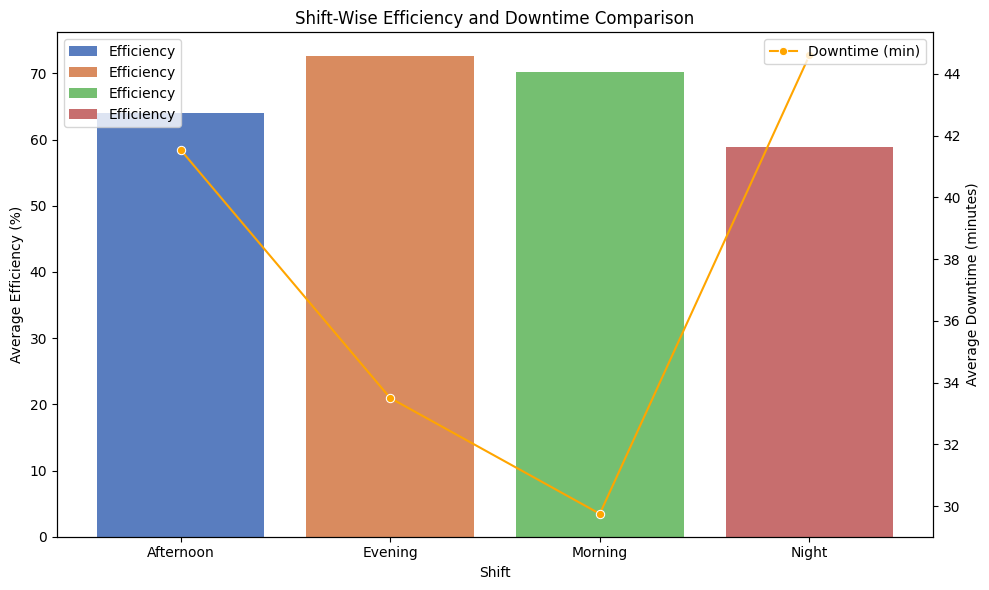

,Shift,Efficiency,Total Downtime
0,Afternoon,63.956093,41.538462
1,Evening,72.559831,33.500000
2,Morning,70.243781,29.750000
3,Night,58.816248,44.600000


In [ ]:
shift_analysis = data.groupby("Shift").agg({
    "Efficiency": "mean",
    "Total Downtime": "mean"
}).reset_index()

# Create a bar plot for efficiency and downtime by shift
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot efficiency
sns.barplot(x="Shift", y="Efficiency", data=shift_analysis, ax=ax1, palette="muted", label="Efficiency")
ax1.set_ylabel("Average Efficiency (%)")
ax1.set_xlabel("Shift")
ax1.set_title("Shift-Wise Efficiency and Downtime Comparison")
ax1.legend(loc="upper left")

# Plot downtime on secondary axis
ax2 = ax1.twinx()
sns.lineplot(x="Shift", y="Total Downtime", data=shift_analysis, ax=ax2, color="orange", label="Downtime (min)", marker="o")
ax2.set_ylabel("Average Downtime (minutes)")
ax2.legend(loc="upper right")

plt.tight_layout()
plt.show()

# Display numerical summary
shift_analysis

<ipython-input-33-db32081eb650>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=downtime_df, x="Count", y="Downtime Factor", palette="coolwarm")


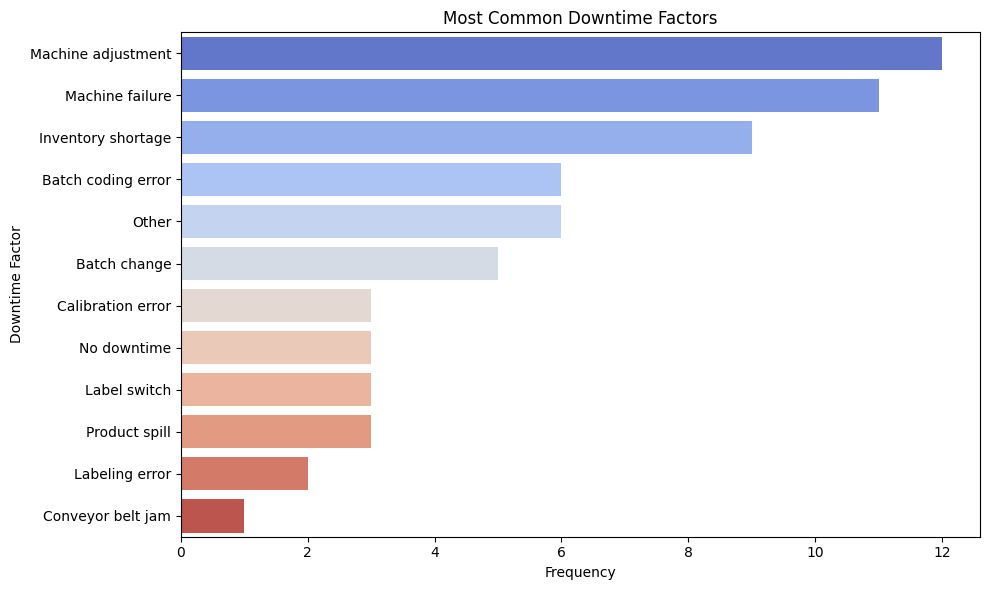

,Downtime Factor,Count
4,Machine adjustment,12
1,Machine failure,11
3,Inventory shortage,9
2,Batch coding error,6
8,Other,6


In [ ]:
# Split and flatten the downtime factors (numbers and descriptions) for analysis
downtime_numbers = data["Downtime Factors (Numbers)"].str.split(", ").sum()
downtime_descriptions = data["Downtime Factors (Descriptions)"].str.split(", ").sum()

# Count the frequency of each downtime factor
downtime_counts = Counter(downtime_descriptions)

# Create a DataFrame for visualization
downtime_df = pd.DataFrame(downtime_counts.items(), columns=["Downtime Factor", "Count"]).sort_values(by="Count", ascending=False)

# Plot the most common downtime factors
plt.figure(figsize=(10, 6))
sns.barplot(data=downtime_df, x="Count", y="Downtime Factor", palette="coolwarm")
plt.title("Most Common Downtime Factors")
plt.xlabel("Frequency")
plt.ylabel("Downtime Factor")
plt.tight_layout()
plt.show()

# Show the top factors for reference
downtime_df.head()